## Подготовка данных

In [15]:
from data_loading import *
import glob
s = [print(x) for x in sorted(glob.glob("../results/rnn/*/*all_runs*"), key = lambda x : x.split("/")[-1])]

../results/rnn/2019-04-30-01-08/rnn_model_1_all_runs_p1_ecoli_100000_10000_50_00.pyob


In [7]:
data_list = generate_data("../results/ecoli_100000_10000", enviroment_size=6, shift = 0)
data = data_list[0]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

# LSTM

In [8]:
from rnn_models import *

In [ ]:
def run_rnn_model_1(data, patience = 1):
    input_size = data.train1.shape[1]
    model = create_rnn_model_1(input_size)
    es = EarlyStopping(monitor='val_loss', verbose=1, patience=patience)
    history = model.fit(data.train1, data.train_ans, epochs=4, callbacks = [es], validation_data=(data.validate1, data.validate_ans))
    return model, history

model, history = run_rnn_model_1(data)

Train on 100000 samples, validate on 10000 samples
Epoch 1/4
 25888/100000 [======>.......................] - ETA: 1:40 - loss: 1.3857 - acc: 0.2625

In [ ]:
model.evaluate(data.test1, data.test_ans)

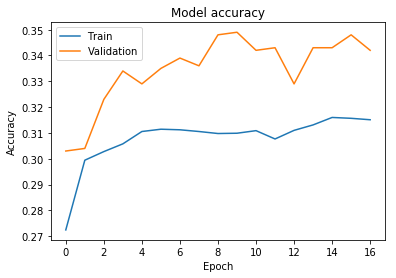

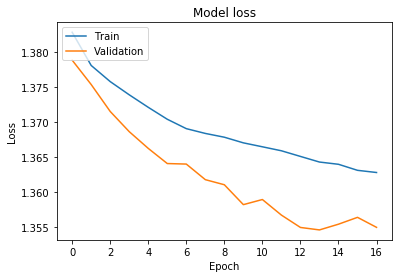

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_history(history.history)

In [89]:
model.evaluate(data.test1, data.test_ans)

1000/1000 [==============================] - 1s 641us/step


[1.3603198890686035, 0.316]

In [90]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 10)                600       
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 44        
Total params: 644
Trainable params: 644
Non-trainable params: 0
_________________________________________________________________


In [18]:
# with open("../results/rnn/rnn_model_1_all_runs_10_p3.pyob", "rb") as file:
#     (test_accs_1, train_accs_1) = pickle.load(file)  
# print(len(test_accs_1))

Попробуем загрузить модель

In [16]:
from keras.models import model_from_json
json_file = open('../results/rnn/2019-04-22-00-12/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("../results/rnn/2019-04-22-00-12/0.weights")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
loaded_model.evaluate(data.test1, data.test_ans)

Loaded model from disk
1000/1000 [==============================] - 2s 2ms/step


[1.3836664791107178, 0.28599999999999998]

In [18]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 44        
Total params: 644
Trainable params: 644
Non-trainable params: 0
_________________________________________________________________


## Статистика

file ../results/rnn/2019-04-30-01-08/rnn_model_1_all_runs_p1_ecoli_100000_10000_50_00.pyob
Number of runs 8
MannwhitneyuResult(statistic=30.0, pvalue=0.4374129884746219)


/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


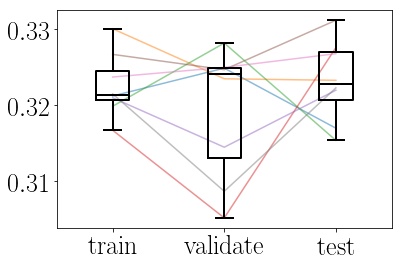

In [17]:
train, val, test = plot_hist("../results/rnn/2019-04-30-01-08/rnn_model_1_all_runs_p1_ecoli_100000_10000_50_00.pyob", 
                             [])